## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

dfm = mouse_metadata.copy()
dfs = study_results.copy()

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
dfm.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
dfs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
dfj = pd.merge(dfm, dfs, on="Mouse ID")
dfj.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# CODE FOR CHECKING FOR AND REPLACING DUPLICATE TIME POINTS FOR THE MOUSE IDs

# I grouped the data by Mouse ID and checked to see whether the number of Timepoints was the same as the number
# of unique timepoints. The for loop makes an array of all the Mouse IDs that have duplicate Timepoints

dfj2g = dfj.groupby("Mouse ID")
dfj3c = dfj2g.count().Timepoint
dfj3u = dfj2g.nunique().Timepoint

errorIDs = []

for x in range(249):
    if dfj3c.values[x] != dfj3u.values[x]:
        errorIDs.append(dfj3c.index[x])
        
#there was only one mouse with duplicate times so I didn't need to make a loop for each Mouse ID with duplicate timepoints

#In this part, I isolate the specific indices that are duplicate timepoints

dfjerror = dfj.loc[dfj["Mouse ID"] == errorIDs[0]] #All the data for the mouse with duplicate Mouse IDs

errorindex = []

dfjindexlist = dfjerror.index.values
max1 = max(dfjindexlist)
min1 = min(dfjindexlist)


for z in np.arange(min1, max1, 1):
    if dfj.at[z,"Timepoint"] == dfj.at[(z+1), "Timepoint"]:
        errorindex.append(z + 1)

# In this part, I replace the value of the tumor size with the average of the tumor size at both time points. 
# Then, I dropped the second row with the duplicate time point. dfj2 is the new corrected dataframe.
        
dfj2 = dfj.copy()

for y in errorindex:
    initial = dfj2.loc[dfj2.index == (y - 1), "Tumor Volume (mm3)"].values[0]
    final = (dfj2.loc[dfj2.index == (y - 1), "Tumor Volume (mm3)"].values[0] + dfj2.loc[dfj2.index == (y), "Tumor Volume (mm3)"].values[0])/2
    dfj2.at[(y - 1), "Tumor Volume (mm3)"] = final
    dfj2 = dfj2.drop(index = y)

dfj2.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# I reran the code to check for Error Mouse IDs with my new dataframe to make sure it was cleaned up.

dfj2g = dfj2.groupby("Mouse ID")
dfj3c = dfj2g.count().Timepoint
dfj3u = dfj2g.nunique().Timepoint

errorIDs = []

for x in range(249):
    if dfj3c.values[x] != dfj3u.values[x]:
        errorIDs.append(dfj3c.index[x])

errorIDs

[]

In [9]:
# Checking the number of mice.

dfj["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# I did this in lines 8 through 12 in my code for this part. All possible error IDs were pushed into the array errorIDs

errorIDs

[]

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

# I did this in line 18

dfjerror

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# I did this in lines 36 - 44. The DataFrame is dfj2


In [13]:
# Checking the number of mice in the clean DataFrame.

dfj2["Mouse ID"].nunique()


249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

dfj2mean = dfj2.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
dfj2median = dfj2.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
dfj2var = dfj2.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
dfj2std = dfj2.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
dfj2sem = dfj2.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

dfj2summary = pd.merge(dfj2mean, dfj2median, on="Drug Regimen")
dfj2summary = dfj2summary.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})

dfj2summary = pd.merge(dfj2summary, dfj2var, on="Drug Regimen")
dfj2summary = pd.merge(dfj2summary, dfj2std, on="Drug Regimen")
dfj2summary = pd.merge(dfj2summary, dfj2sem, on="Drug Regimen")
dfj2summary = dfj2summary.rename(columns = {"Tumor Volume (mm3)_x": "Variance", "Tumor Volume (mm3)_y": "Standard Deviation", "Tumor Volume (mm3)": "Standard Error"})


dfj2summary = dfj2summary.style.set_properties(**{'text-align': 'center'})
dfj2summary



,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.388228,50.833737,43.163594,6.569901,0.526013
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

dfj2aggsummary = dfj2.drop(columns = ['Mouse ID', 'Sex']).groupby("Drug Regimen").agg(['mean', 'median','var','std','sem'])["Tumor Volume (mm3)"]

dfj2aggsummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.388228,50.833737,43.163594,6.569901,0.526013
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

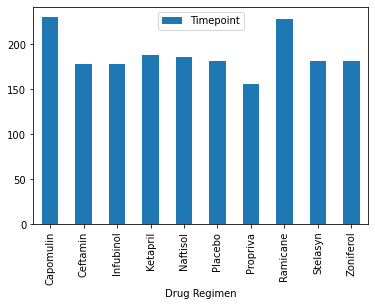

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# xdata = dfj2.groupby("Drug Regimen").count().index.values
# ydata = dfj2.groupby("Drug Regimen").count()["Timepoint"].values

# pd.plot(xdata, ydata)

dff = dfj2.groupby("Drug Regimen").count().reset_index()

dff.plot("Drug Regimen", "Timepoint", kind = 'bar')

plt.show()

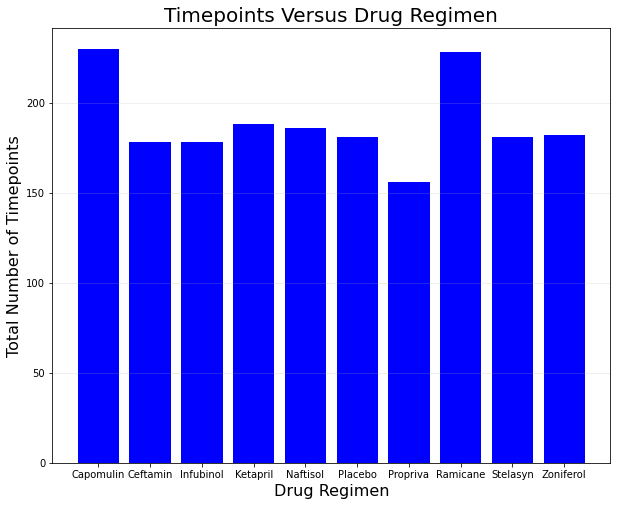

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize = (10,8))

xdata = dfj2.groupby("Drug Regimen").count().index.values
ydata = dfj2.groupby("Drug Regimen").count()["Timepoint"].values

plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Total Number of Timepoints", fontsize = 16)
plt.title("Timepoints Versus Drug Regimen", fontsize = 20)

plt.bar(xdata, ydata, color = "blue")
plt.grid(axis="y", alpha=0.25)
plt.show()


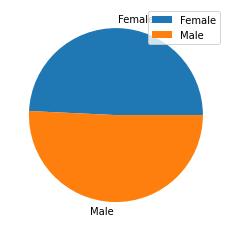

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

dffsex = dfj2.groupby("Sex").count()

dffsex.plot("Sex", "Timepoint", kind = 'pie', ylabel = '')

plt.show()

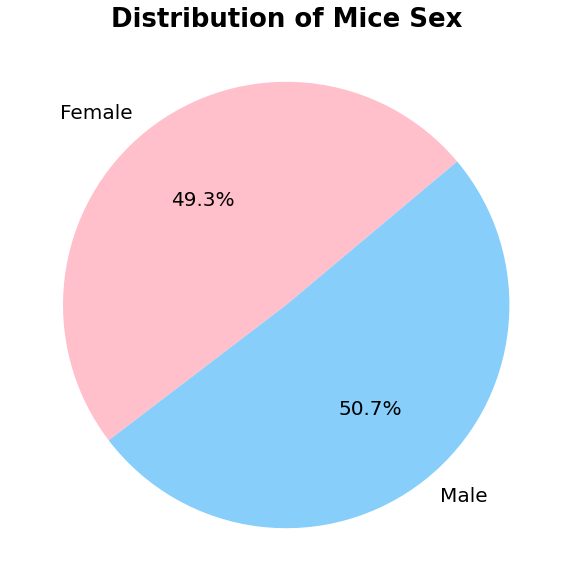

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

dffsex2 = dfj2.groupby("Sex").count()

sexes = dffsex2.index.values
sexnumbers = dffsex2["Mouse ID"].values

colorss = ["pink", "lightskyblue"]


plt.figure(figsize=(10,10))

plt.title("Distribution of Mice Sex", fontsize = 26, fontweight = 'bold')
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')
#fig.gca().add_artist(centre_circle)

plt.pie(sexnumbers, labels=sexes, colors=colorss,
        autopct="%1.1f%%", startangle=40, textprops={'fontsize': 20})
plt.show()



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

dfj2finalvolume = dfj2.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
dfj2finalvolume = dfj2finalvolume.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].reset_index()
dfj2finalvolume = dfj2finalvolume.rename(columns = {"Tumor Volume (mm3)": "Final Volume"})
dfj2finalvolume

,Drug Regimen,Mouse ID,Final Volume
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ceftamin,x226,45.000000
96,Ceftamin,x581,64.634949
97,Ceftamin,x822,61.386660
98,Ceftamin,y769,68.594745


In [42]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

capomulindata = dfj2finalvolume.loc[dfj2finalvolume["Drug Regimen"] == "Capomulin", "Final Volume"]
ramicanedata = dfj2finalvolume.loc[dfj2finalvolume["Drug Regimen"] == "Ramicane", "Final Volume"]
infubinoldata = dfj2finalvolume.loc[dfj2finalvolume["Drug Regimen"] == "Infubinol", "Final Volume"]
ceftamindata = dfj2finalvolume.loc[dfj2finalvolume["Drug Regimen"] == "Ceftamin", "Final Volume"]

treatments = {'Capomulin': capomulindata, 'Ramicane': ramicanedata, 'Infubinol': infubinoldata, 'Ceftamin': ceftamindata}
treatmentnames = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for treatment in treatmentnames:
    print(treatment)
    quartiles = treatments[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("\n\n")
    

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.



Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.



Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.



Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of 

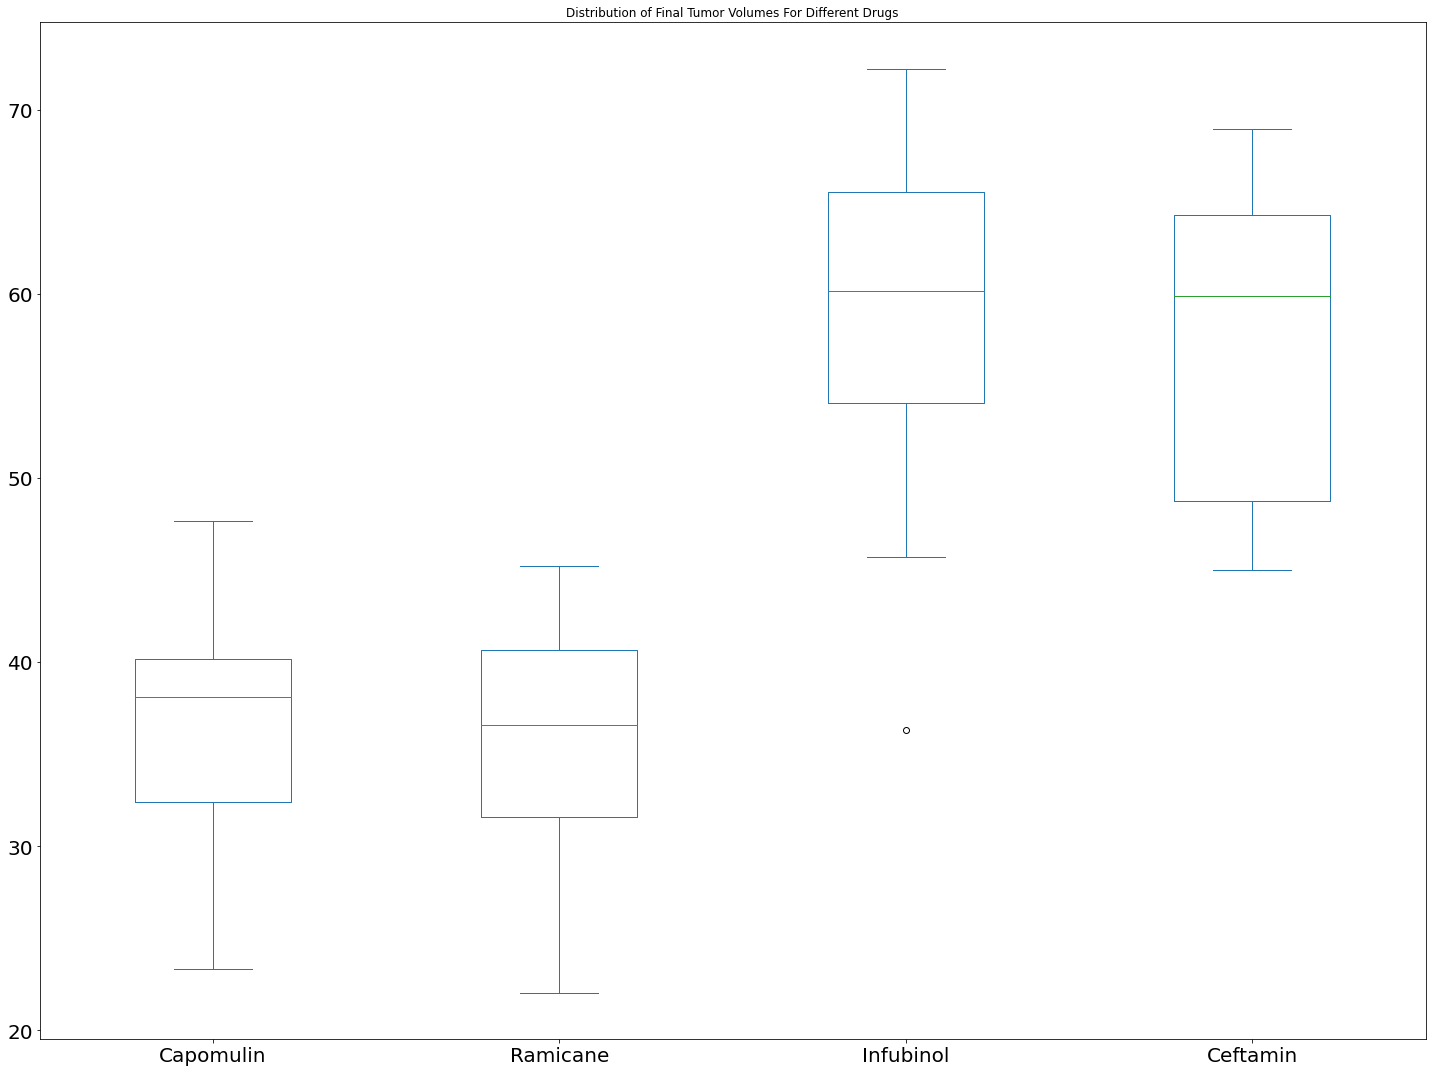

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True


#fig1, ax1 = plt.subplots()
# ax1.boxplot(capomulindata)
# ax1.boxplot(ramicanedata)
boxdata = pd.DataFrame(treatments)
ax = boxdata[['Capomulin', 'Ramicane','Infubinol','Ceftamin']].plot(kind='box', title='Distribution of Final Tumor Volumes For Different Drugs', fontsize = 20)
plt.show()

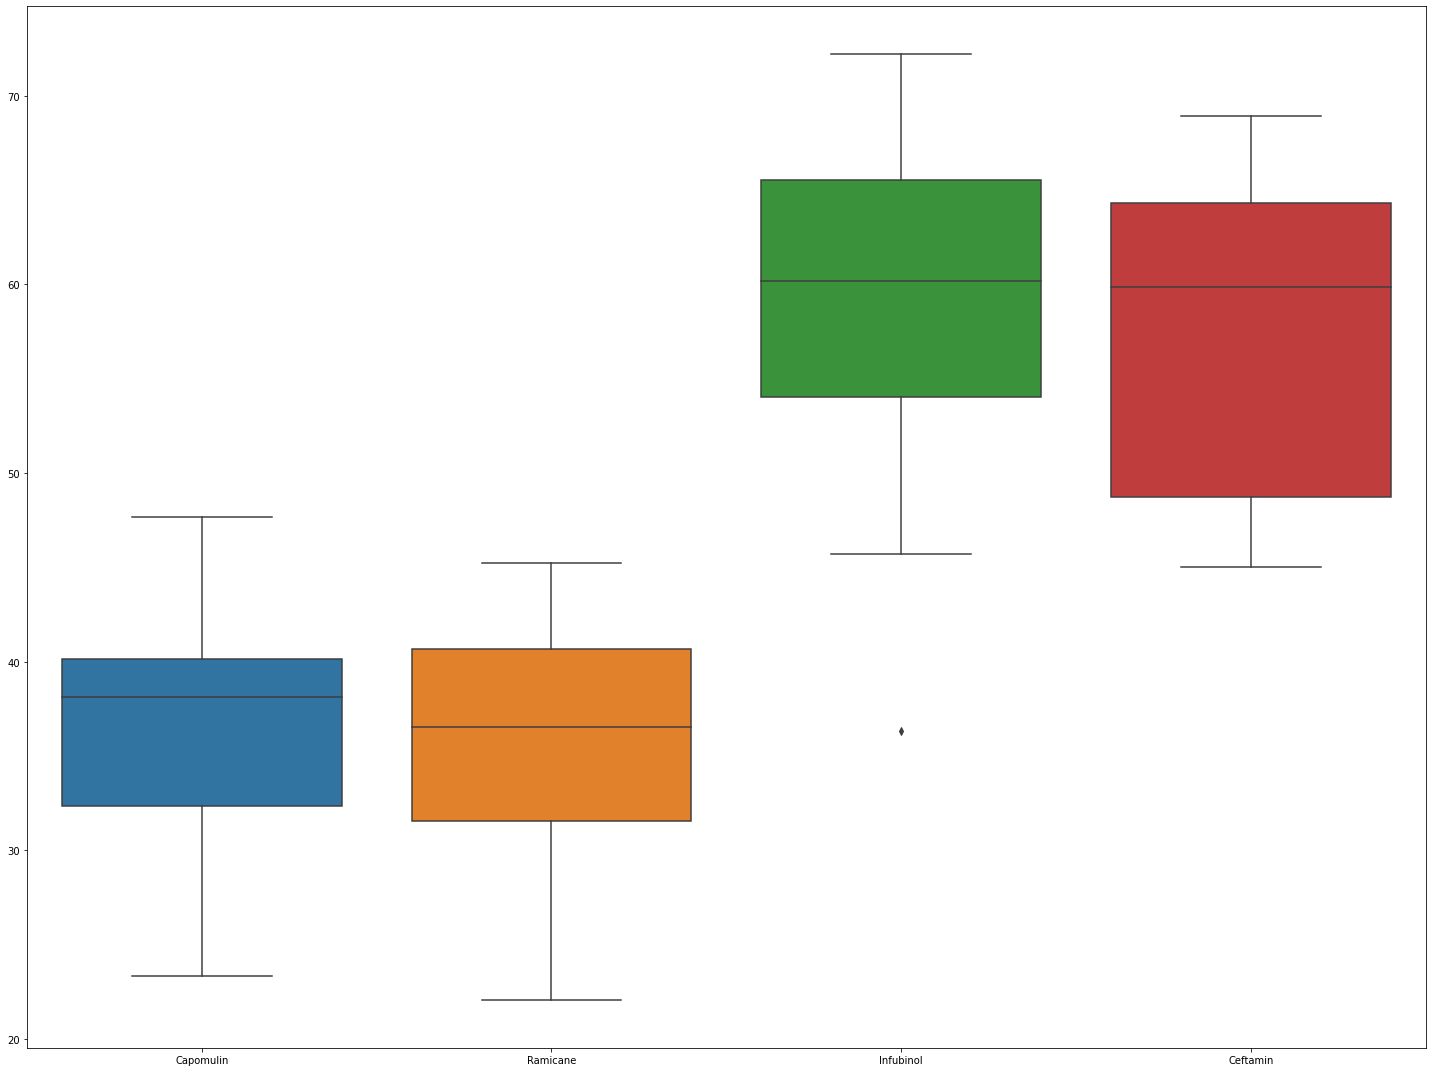

In [97]:
sns.boxplot(data=boxdata)#, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

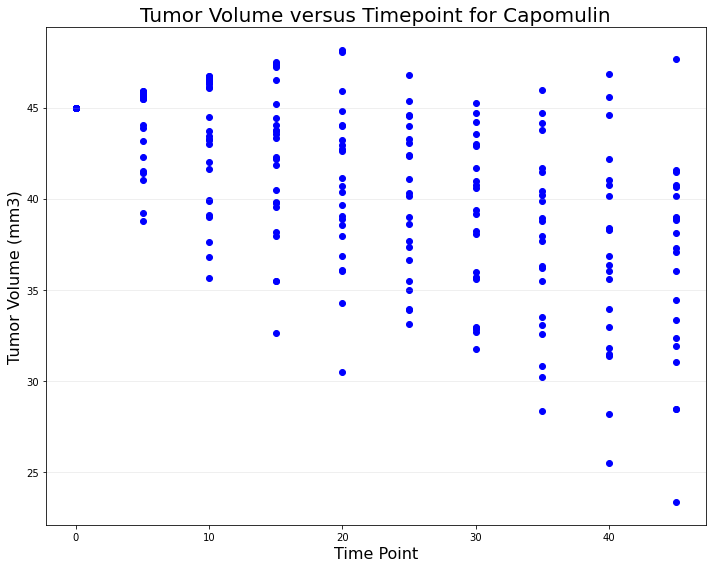

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I did a scatter plot because a line plot was weird. I did the line plot below for average tumor volume

plt.figure(figsize = (10,8))

xdata = dfj2.loc[dfj2["Drug Regimen"] == "Capomulin","Timepoint"].values
ydata = dfj2.loc[dfj2["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"].values

plt.xlabel("Time Point", fontsize = 16)
plt.ylabel("Tumor Volume (mm3)", fontsize = 16)
plt.title("Tumor Volume versus Timepoint for Capomulin", fontsize = 20)

plt.scatter(xdata, ydata, color = "blue")
plt.grid(axis="y", alpha=0.25)
plt.show()


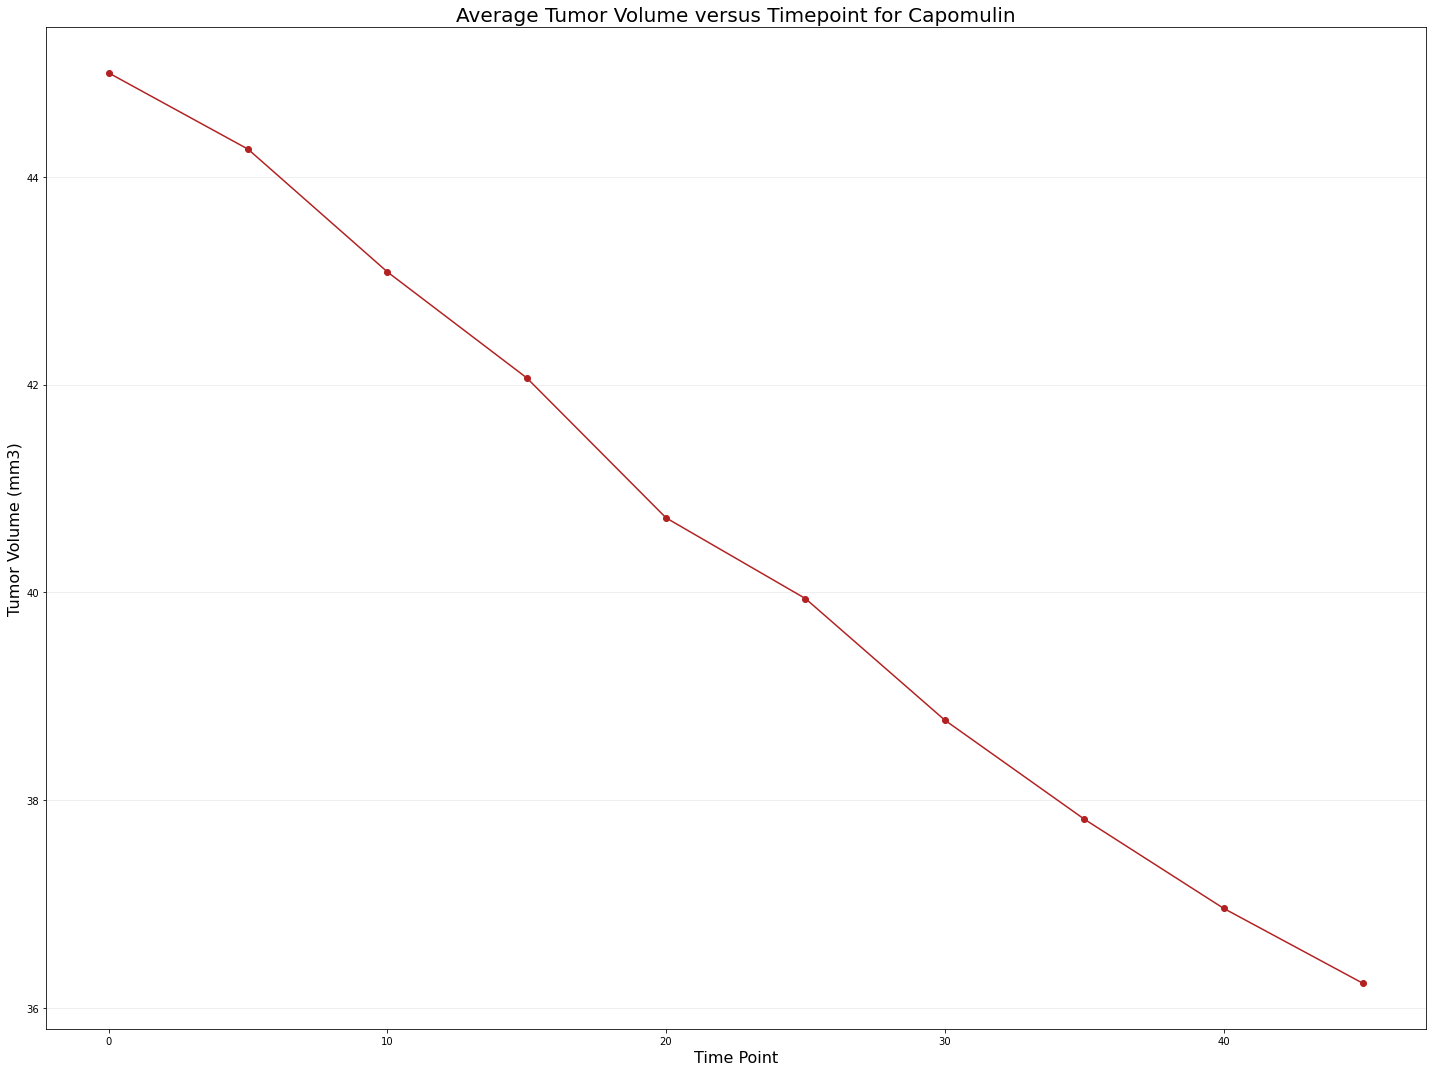

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# A line plot was not useful so I generated a scatter plot. I am going to create a line plot for average tumor volume versus timepoint

dfjydata = dfj2.loc[dfj2["Drug Regimen"] == "Capomulin"]
xdataavg = dfjydata.groupby("Timepoint").mean().index.values
ydataavg = dfjydata.groupby("Timepoint").mean()["Tumor Volume (mm3)"].values

plt.xlabel("Time Point", fontsize = 16)
plt.ylabel("Tumor Volume (mm3)", fontsize = 16)
plt.title("Average Tumor Volume versus Timepoint for Capomulin", fontsize = 20)

plt.plot(xdataavg, ydataavg, color = "firebrick", marker = 'o')
plt.grid(axis="y", alpha=0.25)
plt.show()


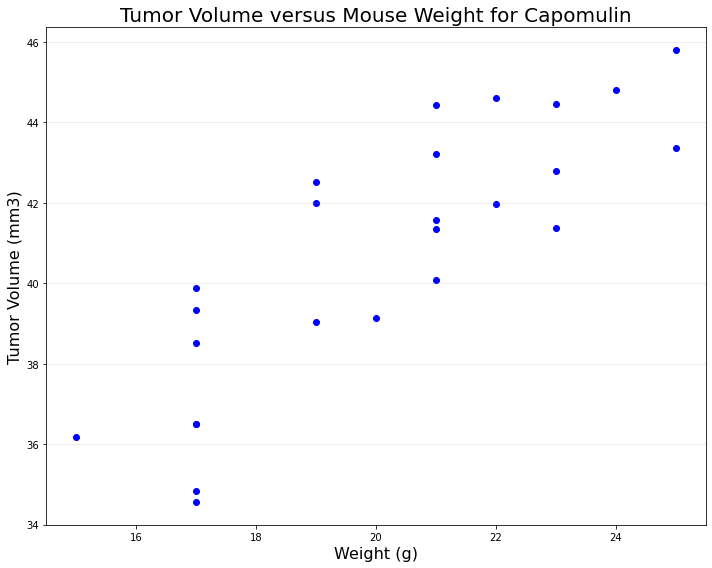

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.figure(figsize = (10,8))

dfjydata = dfj2.loc[dfj2["Drug Regimen"] == "Capomulin"]
xdataweight = dfjydata.groupby("Mouse ID").mean()["Weight (g)"].values
ydataweight = dfjydata.groupby("Mouse ID").mean()["Tumor Volume (mm3)"].values

plt.xlabel("Weight (g)", fontsize = 16)
plt.ylabel("Tumor Volume (mm3)", fontsize = 16)
plt.title("Tumor Volume versus Mouse Weight for Capomulin", fontsize = 20)

plt.scatter(xdataweight, ydataweight, color = "blue")
plt.grid(axis="y", alpha=0.25)
plt.show()

## Correlation and Regression

In [116]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

mouseweightdata = pd.DataFrame({'Weight (g)': xdataweight, 'Tumor Volume (mm3)': ydataweight})

mouseweightdata.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


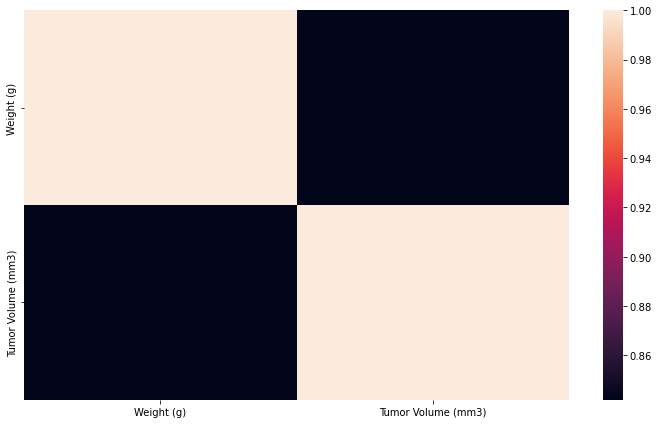

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(mouseweightdata.corr())
plt.show()

The r-squared is: 0.7088568047708723


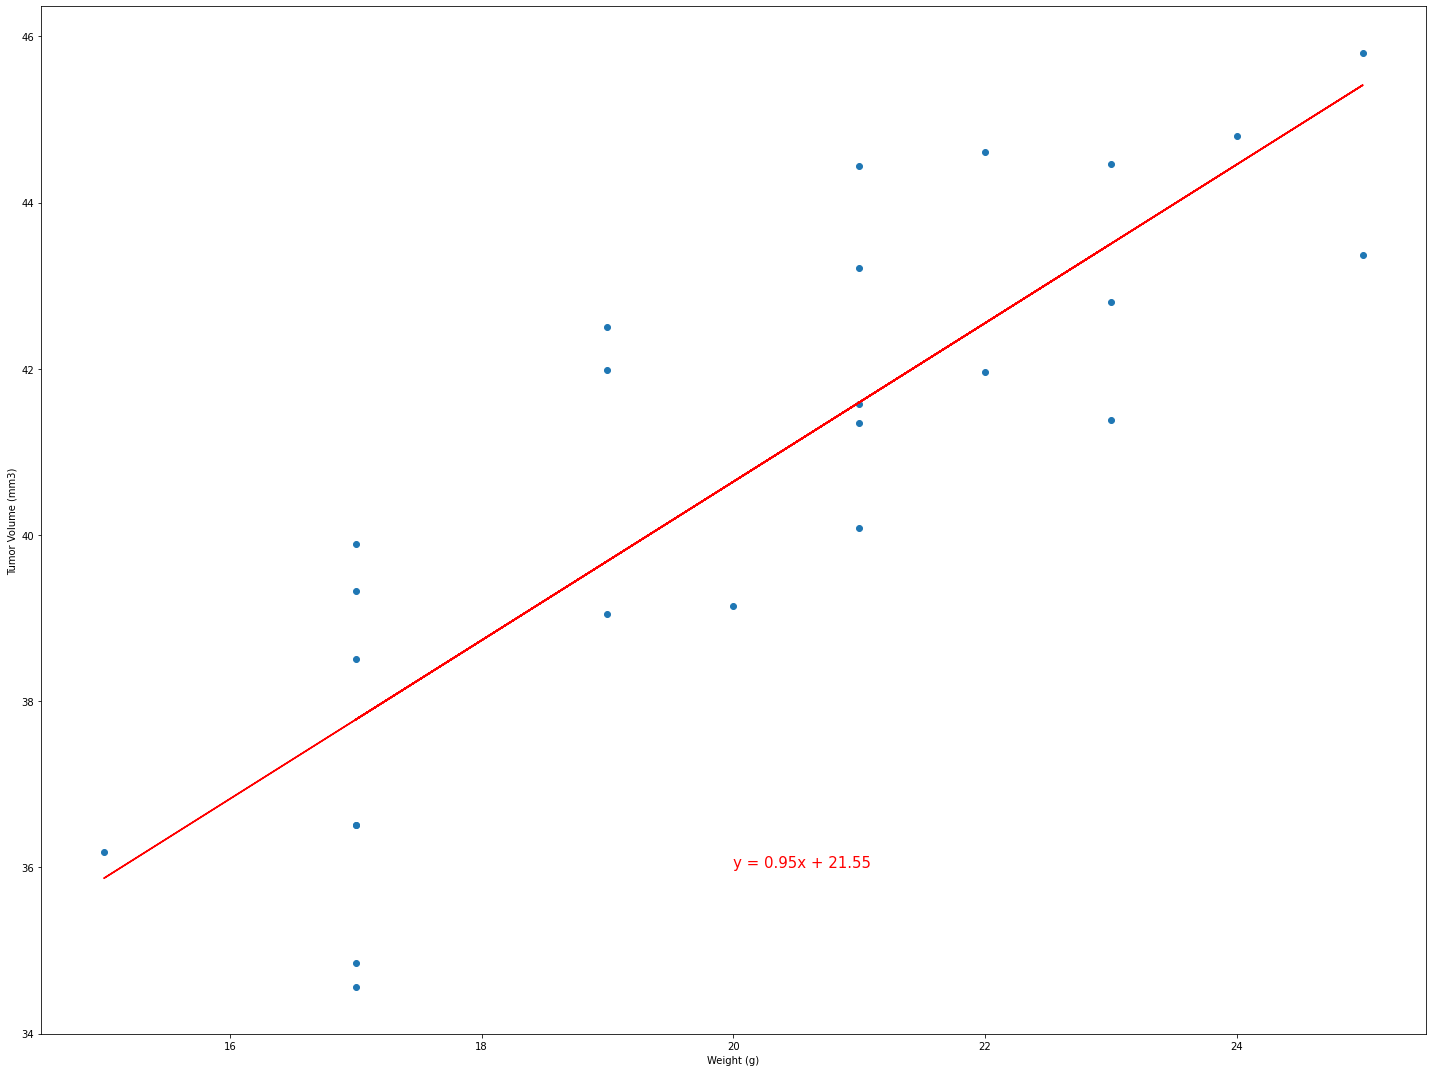

In [119]:
# Print out the r-squared value along with the plot.
x_values = xdataweight
y_values = ydataweight

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Three Observations:

1.  As the timepoint increases, the average Tumor size in mm3 decreases.
2.  Mice treated with Capomulin and Ramicane had final tumor sizes that had medians, maxes, and mins that were quite a 
    bit lower than those treated with Infubinol and Ceftamin.
3.  The number of mice in the study were about equally split between male and female. The number of mice trials was also 
    fairly equally split among the ten different drug treatments.